In [1]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# !pip install dlib
#!pip install dlib --install-option="--yes" --install-option="DLIB_USE_CUDA"
!pip install dlib --force-reinstall
!nvcc --version
!nvidia-smi
!apt-get update
!apt-get install -y --no-install-recommends nvidia-driver-470  # ou versão mais recente

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.9-cp311-cp311-linux_x86_64.whl size=4539746 sha256=3665e2538df87b86221073c9437a7040ab07f7b6952f8fe913ba9eebdfa5141b
  Stored in directory: /root/.cache/pip/wheels/1e/01/c7/2aa7ccf47d6bf0cb20fc98c3817c1fabe8e5f2f8925b3498c9
Successfully built dlib
  Attempting uninstall: dlib
    Found existing installation: dlib 19.24.2
    Uninstalling dlib-19.24.2:
      Successfully uninstalled dlib-19.24.2
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Tue May 20 20:38:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version

In [2]:
# NAO FUNCIONOU COM CUDA

# Importar bibliotecas
import cv2
import dlib
from google.colab.patches import cv2_imshow

# Carregar imagem
caminho_imagem = '/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people2.jpg'
imagem = cv2.imread(caminho_imagem)

if imagem is None:
    print("Erro: imagem não encontrada.")
else:
    # Carregar pesos do detector CNN (sem acento no nome da pasta "Computacao")
    caminho_pesos = '/content/drive/MyDrive/Visao Computacional Guia Completo/Weights/mmod_human_face_detector.dat'
    detector_face_cnn = dlib.cnn_face_detection_model_v1(caminho_pesos)

    # Detectar faces
    deteccoes = detector_face_cnn(imagem, 1)

    # Mostrar detecções
    for i, face in enumerate(deteccoes):
        l, t, r, b = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom()
        confianca = face.confidence

        cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)
        cv2.putText(imagem, f"{confianca:.2f}", (l, t - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        print(f"Face {i+1}: Confiança = {confianca:.2f}")

    cv2_imshow(imagem)


RuntimeError: Error while calling cudaOccupancyMaxPotentialBlockSize(&num_blocks,&num_threads,K) in file /tmp/pip-install-vbkelcxs/dlib_1f28f658c1174003b31a5b3e638ec4b9/dlib/cuda/cuda_utils.h:164. code: 222, reason: the provided PTX was compiled with an unsupported toolchain.

Face 1: Confiança = 2.57
Face 2: Confiança = 2.53
Face 3: Confiança = 2.46
Face 4: Confiança = 2.30
Face 5: Confiança = 2.24
Face 6: Confiança = 2.04
Face 7: Confiança = 1.93
Face 8: Confiança = 1.91
Face 9: Confiança = 1.83
Face 10: Confiança = 1.76
Face 11: Confiança = 1.66
Face 12: Confiança = 1.21
Face 13: Confiança = 1.13
Face 14: Confiança = 0.75


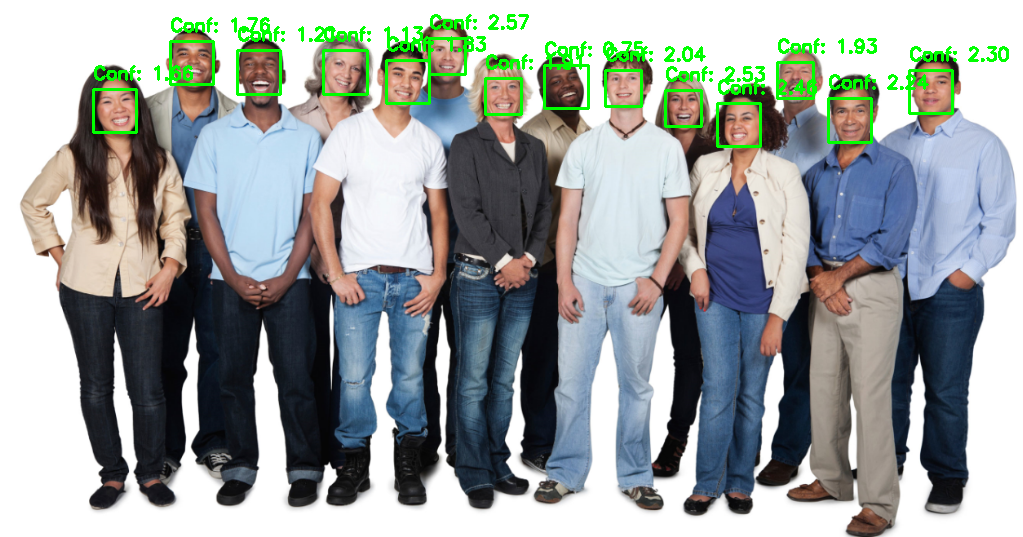

In [3]:
# OUTRO TESTE COM CONFIANCA DE RECONHECIMENTO:

!pip install dlib  # Instala sem forçar CUDA
import cv2
import dlib
from google.colab.patches import cv2_imshow

# Carregar imagem
caminho_imagem = '/content/drive/MyDrive/Visao Computacional Guia Completo/Images/people2.jpg'
imagem = cv2.imread(caminho_imagem)

if imagem is None:
    print("Erro: imagem não encontrada.")
else:
    # Usar detector HOG (retorna retângulos + scores de confiança)
    detector_hog = dlib.get_frontal_face_detector()

    # O método .run() retorna (dets, scores, idx)
    dets, scores, idx = detector_hog.run(imagem, 1)  # upsample=1 (ajuste conforme necessário)

    # Desenhar retângulos e mostrar confiança
    for i, (face, score) in enumerate(zip(dets, scores)):
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()

        cv2.rectangle(imagem, (l, t), (r, b), (0, 255, 0), 2)
        cv2.putText(imagem, f"Conf: {score:.2f}", (l, t-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        print(f"Face {i+1}: Confiança = {score:.2f}")

    cv2_imshow(imagem)